In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18


# Define device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# Define transforms for data augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                         shuffle=False, num_workers=2)

# Define ResNet-18 model and move it to the GPU
net = resnet18()
net.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

# Train the model
for epoch in range(1):  # number of epochs
    running_loss = 0.0
    net.train()  # set model to training mode

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 100 == 99:
            print('[%d, %5d] training loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

    net.eval()  # set model to evaluation mode
    correct = 0
    total = 0

#     with torch.no_grad():
#         for data in trainloader:
#             images, labels = data
#             images, labels = images.to(device), labels.to(device)

#             outputs = net(images)
#             _, predicted = torch.max(outputs.data, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()

#     val_acc = 100 * correct / total
#     print('epoch [%d] train accuracy: %.2f %%' % (epoch+1,val_acc))

print('Finished Training')


# Test the model
# correct = 0
# total = 0
# with torch.no_grad():
#     for data in testloader:
#         images, labels = data
#         images, labels = images.to(device), labels.to(device)
#         outputs = net(images)
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

# print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))


In [30]:
#import torchvision.models as models
def visualize_activations(layer_idx, img_idx):
    # Get the activations for the given image
    with torch.no_grad():
        img, _ = testset[img_idx]
        img = img.unsqueeze(0).to(device)
        x = img
        for i, module in enumerate(net.children()):
            x = module(x)
            if i == layer_idx:
                activations = x
                break
    
    # Plot the activations in a grid of subplots
    fig, axs = plt.subplots(8, 8, figsize=(10, 10))
    for i in range(8):
        for j in range(8):
            ax = axs[i, j]
            channel_idx = i*8+j
            if channel_idx < activations.shape[1]:
                ax.imshow(activations[0, channel_idx, :, :].detach().cpu().numpy())
                ax.axis('off')
            else:
                ax.set_axis_off()
    plt.show()


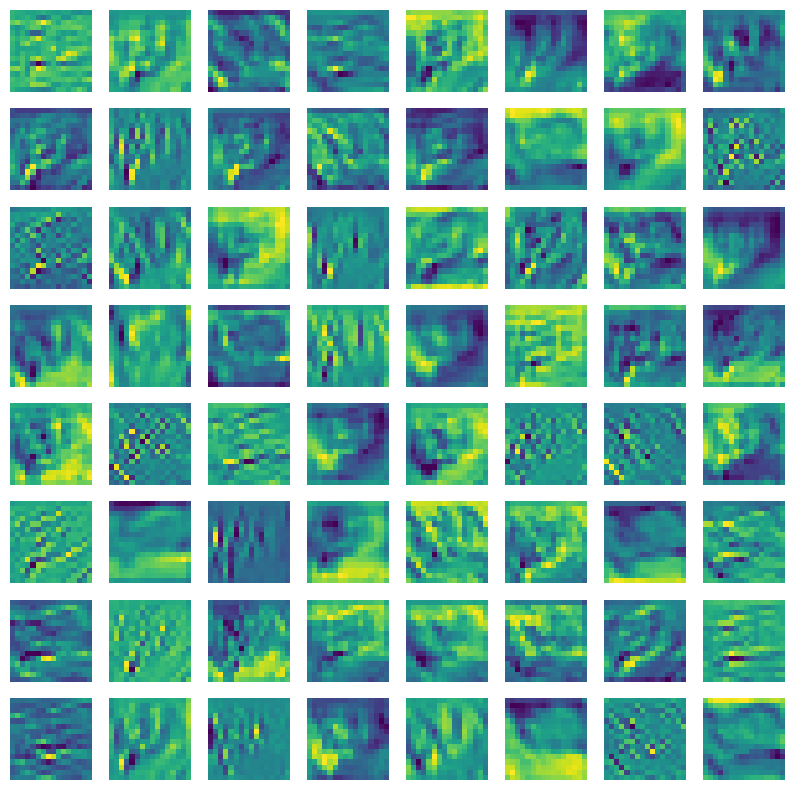

fith layer


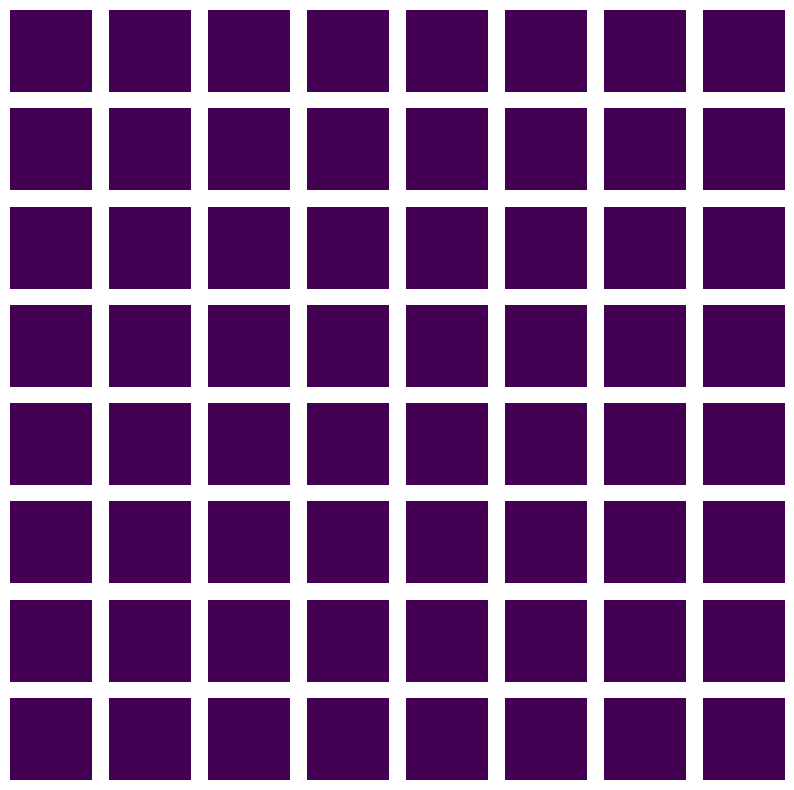

In [39]:
for i in range(1):
    visualize_activations(0, i)
print("fith layer")
for i in range(1):
    visualize_activations(7, i)